# Regression Models RMSE Comparison

This notebook performs a regression task using the California Housing dataset from scikit-learn. We train 13 different regressors, evaluate their performance using Root Mean Squared Error (RMSE), and visualize the results in a bar plot.

## Step 1: Import Libraries

We import necessary libraries for data handling, model training, evaluation, and visualization.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.kernel_ridge import KernelRidge
%matplotlib inline

## Step 2: Load and Prepare Data

We load the California Housing dataset, split it into training and testing sets, and scale the features.

In [6]:
# Load the dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 3: Define and Train Regressors

We define 13 regression models and train them on the scaled training data, computing RMSE on the test set.

In [7]:
# Define regressors
regressors = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
    'MLP': MLPRegressor(random_state=42, max_iter=1000),
    'Gaussian Process': GaussianProcessRegressor(random_state=42),
    'Kernel Ridge': KernelRidge()
}

# Train and evaluate
rmse_scores = {}
for name, reg in regressors.items():
    reg.fit(X_train_scaled, y_train)
    y_pred = reg.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores[name] = rmse
    print(f'{name} RMSE: {rmse:.4f}')

Linear Regression RMSE: 0.7456
Ridge RMSE: 0.7456
Lasso RMSE: 1.1449
ElasticNet RMSE: 1.0219
Decision Tree RMSE: 0.7028
Random Forest RMSE: 0.5051
Gradient Boosting RMSE: 0.5422
AdaBoost RMSE: 0.7839
SVR RMSE: 0.5975
KNN RMSE: 0.6576
MLP RMSE: 0.5407
Gaussian Process RMSE: 49.4417
Kernel Ridge RMSE: 2.2053


## Step 4: Visualize RMSE Scores

We create a bar plot to compare the RMSE scores of all regressors.

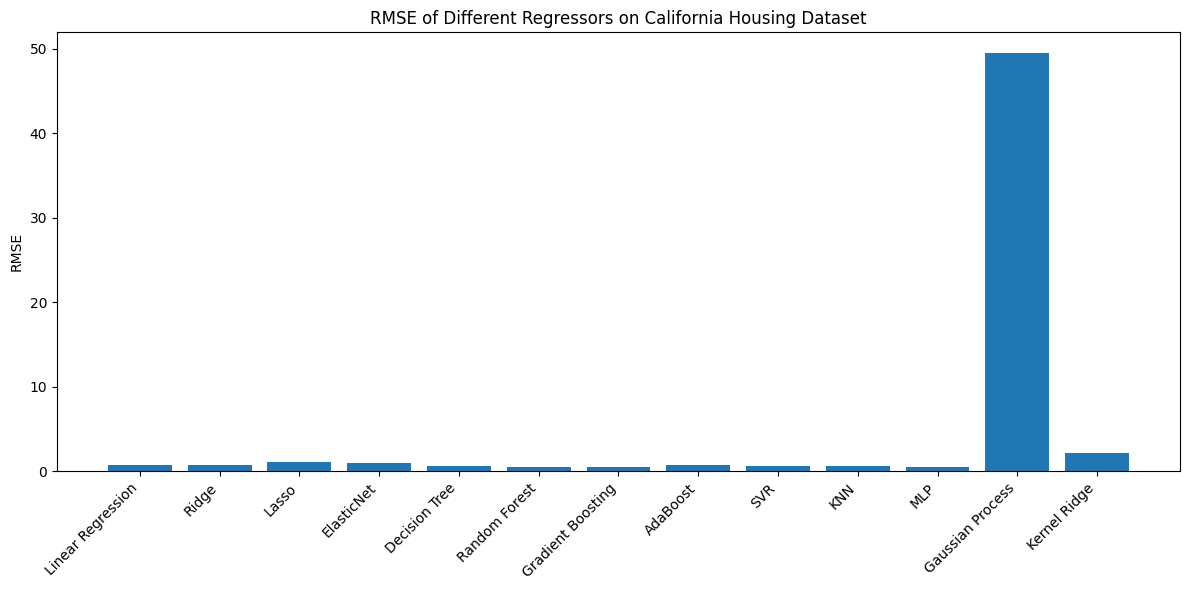

In [8]:
# Plot RMSE scores
plt.figure(figsize=(12, 6))
plt.bar(rmse_scores.keys(), rmse_scores.values())
plt.xticks(rotation=45, ha='right')
plt.ylabel('RMSE')
plt.title('RMSE of Different Regressors on California Housing Dataset')
plt.tight_layout()
plt.savefig('rmse_comparison.png')
plt.show()

## Notes

- The California Housing dataset predicts median house values based on features like median income and house age.
- We use default hyperparameters for simplicity; in practice, consider hyperparameter tuning (e.g., via GridSearchCV).
- The plot is saved as 'rmse_comparison.png' and displayed inline.